# 네이버 영화에서 제목과 별점정보만 추출하기

In [1]:
import requests
from bs4 import BeautifulSoup

In [2]:
response = requests.get('https://movie.naver.com/movie/running/current.naver')
response

<Response [200]>

In [3]:
html = response.text
html

'\r\n\r\n\r\n\r\n\r\n\r\n\r\n\r\n\r\n\t\r\n\t\r\n\t\r\n\t\r\n\t\r\n\t\r\n\r\n<!DOCTYPE html>\r\n<html lang="ko">\r\n<head>\r\n<meta charset="utf-8">\r\n<meta http-equiv="X-UA-Compatible" content="IE=edge">\r\n<meta http-equiv="imagetoolbar" content="no">\r\n<title>현재 상영영화 : 네이버 영화</title>\r\n\r\n\t\r\n\t\r\n\t\r\n\t\r\n\t\r\n\t\t\r\n\t\t\r\n\t\r\n\r\n\r\n\r\n<meta property="me2:image" content="https://ssl.pstatic.net/imgmovie/today/naverme/naverme_profile.jpg"/>\r\n<meta property="me2:post_tag" content="네이버영화 현재상영작"/>\r\n<meta property="me2:category1" content="네이버영화"/>\r\n<meta property="me2:category2" content="현재상영작"/>\r\n\r\n\r\n\r\n\t\r\n\t\t<meta property="og:title" content="현재상영작 : 네이버 영화" />\r\n\t\r\n\t\r\n\t\r\n\r\n\r\n<meta property="og:type" content="article"/>\r\n\r\n<meta property="og:url" content="https://movie.naver.com/movie/running/current.naver"/>\r\n\r\n\r\n\t\r\n\t\r\n\t\t<meta property="og:image" content="https://ssl.pstatic.net/static/m/movie/icons/OG_270_270.png"/>

In [4]:
soup=BeautifulSoup(html, 'html.parser')
soup


<!DOCTYPE html>

<html lang="ko">
<head>
<meta charset="utf-8"/>
<meta content="IE=edge" http-equiv="X-UA-Compatible"/>
<meta content="no" http-equiv="imagetoolbar"/>
<title>현재 상영영화 : 네이버 영화</title>
<meta content="https://ssl.pstatic.net/imgmovie/today/naverme/naverme_profile.jpg" property="me2:image">
<meta content="네이버영화 현재상영작" property="me2:post_tag">
<meta content="네이버영화" property="me2:category1">
<meta content="현재상영작" property="me2:category2"/>
<meta content="현재상영작 : 네이버 영화" property="og:title"/>
<meta content="article" property="og:type"/>
<meta content="https://movie.naver.com/movie/running/current.naver" property="og:url"/>
<meta content="https://ssl.pstatic.net/static/m/movie/icons/OG_270_270.png" property="og:image"/>
<meta content="상영 중 영화의 예매율/평점/좋아요 순 정보 제공." property="og:description"/>
<meta content="https://ssl.pstatic.net/imgmovie/today/naverme/naverme_profile.jpg" property="og:article:thumbnailUrl"/>
<meta content="네이버 영화" property="og:article:author"/>
<meta content=

In [5]:
title=soup.select('#content > div.article > div:nth-child(1) > div.lst_wrap > ul > li > dl > dt > a')
title
#title[0].text

titleList=[] # 타이틀만 담을 빈 리스트 
for i in range(0,10):
    titleList.append(title[i].text) #타이틀 요소 하나씩 리스트에 추가 
print(titleList)

['씽2게더', '스파이더맨: 노 웨이 홈', '웨스트 사이드 스토리', '경관의 피', '특송', '하우스 오브 구찌', '라임크라임', '드라이브 마이 카', '청춘적니', '해탄적일천']


In [6]:
starRate = soup.select('#content > div.article > div:nth-child(1) > div.lst_wrap > ul > li > dl > dd.star > dl.info_star > dd > div > a > span.num')
starRate
starRate[0].text

'9.41'

In [7]:
starRateArray = [] #별점을 담을 빈 리스트 
for i in range(0,10):
    starRateArray.append(starRate[i].text) #별점 요소를 하나씩 리스트에 추가
print(starRateArray)

float_list = list(map(float, starRateArray)) #문자열배열을 숫자배열로 변환 
print(float_list)
    

['9.41', '8.92', '6.89', '7.69', '8.69', '8.41', '8.58', '8.64', '7.45', '8.30']
[9.41, 8.92, 6.89, 7.69, 8.69, 8.41, 8.58, 8.64, 7.45, 8.3]


In [8]:
print("[결과, 예매순 상위 10개]")
for i in range(0,10): 
    print("{}.{} / 별점 : {}" .format(i+1,titleList[i], starRateArray[i]))

[결과, 예매순 상위 10개]
1.씽2게더 / 별점 : 9.41
2.스파이더맨: 노 웨이 홈 / 별점 : 8.92
3.웨스트 사이드 스토리 / 별점 : 6.89
4.경관의 피 / 별점 : 7.69
5.특송 / 별점 : 8.69
6.하우스 오브 구찌 / 별점 : 8.41
7.라임크라임 / 별점 : 8.58
8.드라이브 마이 카 / 별점 : 8.64
9.청춘적니 / 별점 : 7.45
10.해탄적일천 / 별점 : 8.30


## 예매순 상위 10개의 별점 점수에 대해 그래프로 시각화하기

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

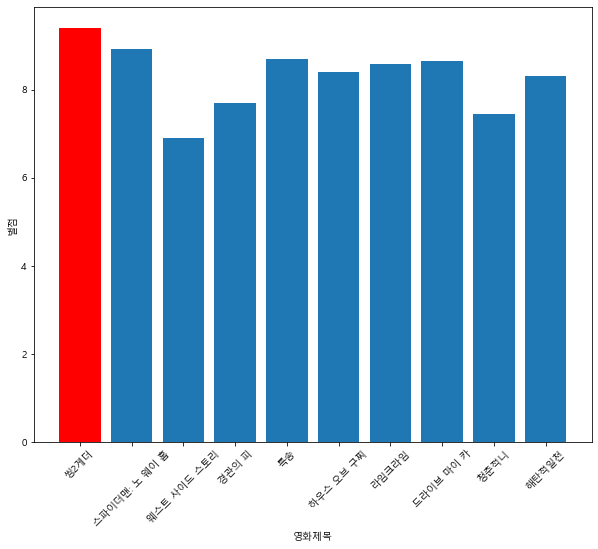

In [10]:
#x축: titleList[]
plt.figure(figsize=(10, 8))
x_pos = np.arange(len(titleList))

#x축 위에 올릴 세로 bar
#plt.bar(x축, 세로로 쓸 내용)
bar_list = plt.bar(x_pos, float_list)

#한글 폰트 지정
plt.rc('font', family = 'Malgun Gothic')
#print(plt.rcParams['font.family'])

bar_list[len(float_list)-10].set_color('r') #bar_list의 첫번째 바를 색을 r로 지정

plt.xlabel('영화제목')
plt.ylabel('별점')
plt.xticks(x_pos, titleList, rotation =45)
plt.show()

In [11]:
import matplotlib
matplotlib.matplotlib_fname()

'C:\\Users\\YJ\\anaconda3\\lib\\site-packages\\matplotlib\\mpl-data\\matplotlibrc'